# Use-case 3: Content Ratings Analysis

---
---

## Preparing environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

df_rating = pd.read_csv('data/banijay_op1data_ratings_processed.csv', encoding='utf-8', compression='zip')
df_content = pd.read_csv('data/banijay_op1data_content_processed.csv', encoding='utf-8', compression='zip')
df_merged = pd.read_csv('data/banijay_op1data_content_ratings.csv', encoding='utf-8', compression='zip')

---

In [2]:
df_totaal = df_merged[df_merged['Ratings Type'] == 'totaal']

In [3]:
df_totaal.head()

,Unnamed: 0,Datum,Time,Program,Station,Target Group,Broadcast Type,Ratings Type,Kdh%,Kdh000,...,length,start,end,title,summary,keywords,date_time_start,date_time_end,show_id,fragment
2,2,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,totaal,10.299407,1646.360210,...,00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment
5,5,2020-01-06,22:18:00,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,totaal,3.975244,145.573420,...,00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment
8,8,2020-01-06,22:18:00,op1,npo1,boodschapper_25_54,live/prerecorded uitzendingen,totaal,6.271663,251.242825,...,00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment
11,11,2020-01-06,22:18:00,op1,npo1,6_12_jr,live/prerecorded uitzendingen,totaal,1.025859,13.510569,...,00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment
14,14,2020-01-06,22:18:00,op1,npo1,13_19_jr,live/prerecorded uitzendingen,totaal,2.895596,41.783444,...,00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment


In [4]:
df_totaal['date_time'].head()

2     2020-01-06 22:18:00
5     2020-01-06 22:18:00
8     2020-01-06 22:18:00
11    2020-01-06 22:18:00
14    2020-01-06 22:18:00
Name: date_time, dtype: object

In [5]:
del df_totaal['Unnamed: 0'] #Deleting this column, because it is not needed.

## Target Audience Analysis

### What is the average Kdh000?

In [6]:
df_totaal['Kdh000'].mean()

288.14869171752906

### What is the average Kdh000, per target group?

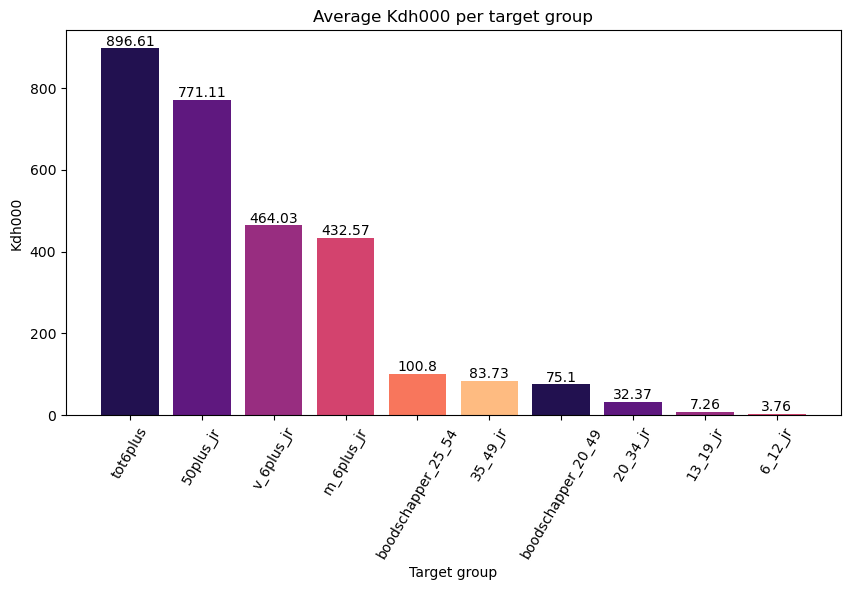

In [7]:
df_aggregated = df_totaal.groupby('Target Group')['Kdh000'].mean().sort_values(ascending=False) #Grouping the data by target group and calculating the mean of the Kdh000 column.
df_aggregated = pd.DataFrame(df_aggregated) #Converting the series to a data frame.

colors = sns.color_palette('magma') #Set the color palette
plt.figure(figsize=(10, 5)) #Setting the size of the plot
plt.bar(df_aggregated.index, df_aggregated['Kdh000'], color=colors)
plt.title('Average Kdh000 per target group') #Setting the title of the plot.
plt.xlabel('Target group') #Setting the x-axis label.
plt.ylabel('Kdh000') #Setting the y-axis label.
plt.xticks(rotation=60) #Rotating the x-axis labels so it is better readable.

#Add annotation to bars
for index, value in enumerate(df_aggregated['Kdh000']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.savefig('visualization/Average Kdh000 per target group.png') #Saving the plot as a png file.

## Content Analysis

### Who are the most highly rated hosts? Visualize the top 5.

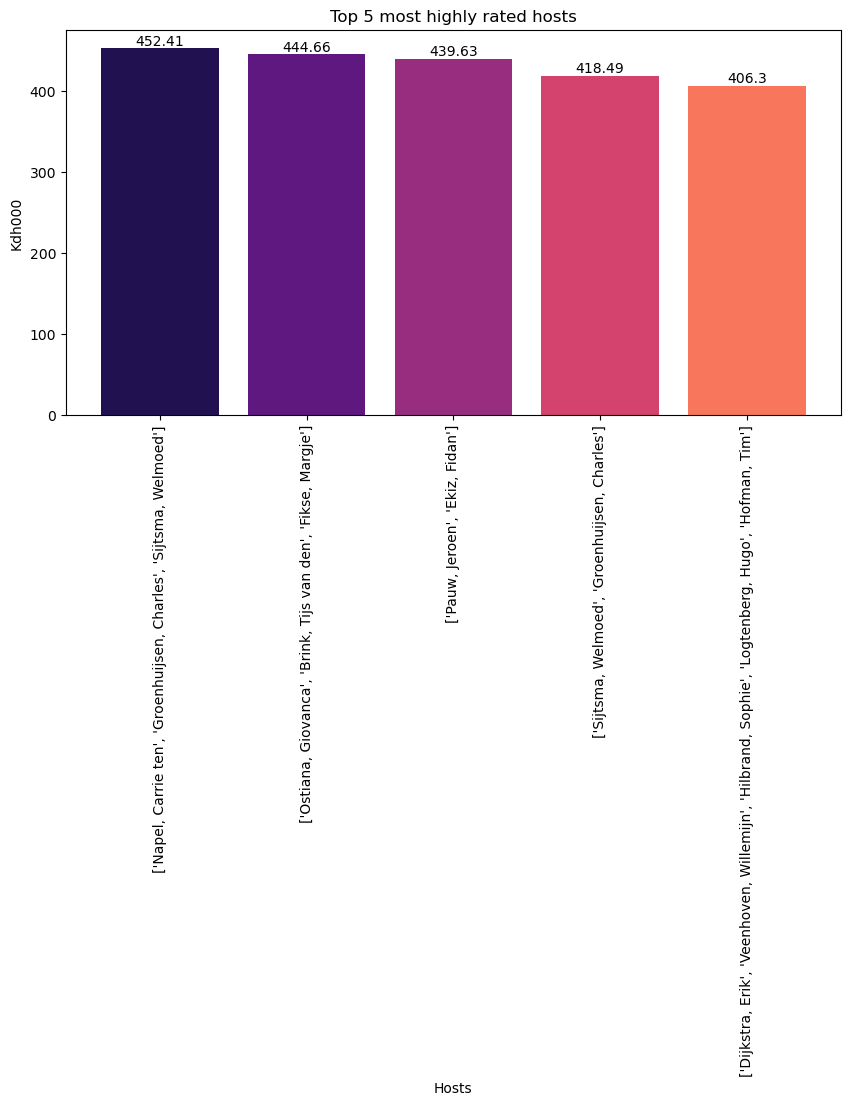

In [8]:
df_host = df_totaal.groupby('hosts')['Kdh000'].mean().sort_values(ascending=False).head(5) #Grouping the data by host and calculating the mean of the Kdh000 column.
df_host = pd.DataFrame(df_host) #Converting the series to a dataframe

colors = sns.color_palette('magma') #Set the color palette
plt.figure(figsize=(10, 5)) #Setting the size of the plot
plt.bar(df_host.index, df_host['Kdh000'], color=colors)
plt.title('Top 5 most highly rated hosts') #Setting the title of the plot.
plt.xlabel('Hosts') #Setting the x-axis label.
plt.ylabel('Kdh000') #Setting the y-axis label.
plt.xticks(rotation=90) #Rotating the x-axis labels so it is better readable.

#Add annotation to bars
for index, value in enumerate(df_host['Kdh000']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
    
plt.savefig('visualization/Top 5 most highly rated hosts.png') #Saving the plot as a png file.

### What are the most highly rated shows? Visualize the top 5.

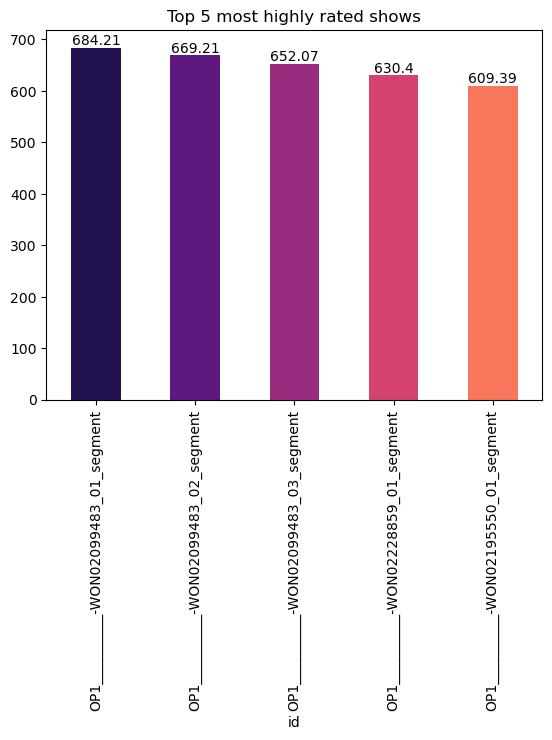

In [9]:
df_per_show = df_totaal.groupby('id')['Kdh000'].mean().sort_values(ascending=False) #Grouping the data by id and calculating the mean of the Kdh000 column.

colors = sns.color_palette('magma') #Set the color palette
df_per_show[:5].plot(kind='bar', title='Top 5 most highly rated shows', color = colors) #Plotting the top 5 most highly rated shows.

#Add annotation to bars
for index, value in enumerate(df_per_show[:5]):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.savefig('visualization/Top 5 most highly rated shows.png') #Saving the plot as a png file.

### Make a word cloud of the keywords

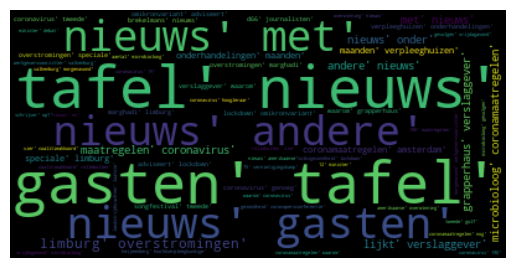

In [10]:
keyword = df_totaal.groupby(['keywords']).mean('Kdh000')
wc = WordCloud()
wc.generate(''.join(df_totaal['keywords']))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off') 
plt.savefig('visualization/Word cloud of keywords.png') #Saving the plot as a png file.

## Trend Analysis

### What is the average rating for all shows, per month?

In [11]:
df_totaal['date_time'] = pd.to_datetime(df_totaal['date_time']) #Converting the date_time column to a datetime object.

C:\Users\maxme\AppData\Local\Temp\ipykernel_30196\2567782810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totaal['date_time'] = pd.to_datetime(df_totaal['date_time']) #Converting the date_time column to a datetime object.


In [12]:
linechart_month = df_totaal.groupby(df_totaal['date_time'].dt.month)["Kdh000"].mean() #Grouping the data by month and calculating the mean of the Kdh000 column.

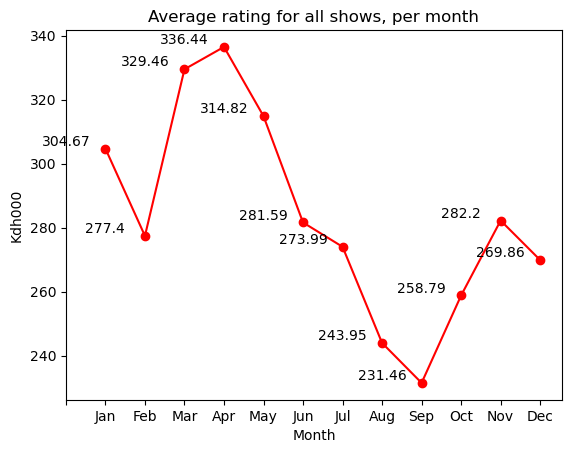

In [13]:
plt.plot(linechart_month, marker = 'o', color='r')
plt.title('Average rating for all shows, per month') #plot title
plt.xticks(range(13), [' ', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) #x-axis labels
plt.xlabel('Month') #x-axis label
plt.ylabel('Kdh000') #y-axis label

#Add annotation to bars
for index, value in enumerate(linechart_month):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.savefig('visualization/Average rating for all shows, per month.png') #Saving the plot as a png file.

### What is the average rating for all shows, per day of the week?

In [14]:
linechart_weekday = df_totaal.groupby(df_totaal['date_time'].dt.weekday)["Kdh000"].mean()

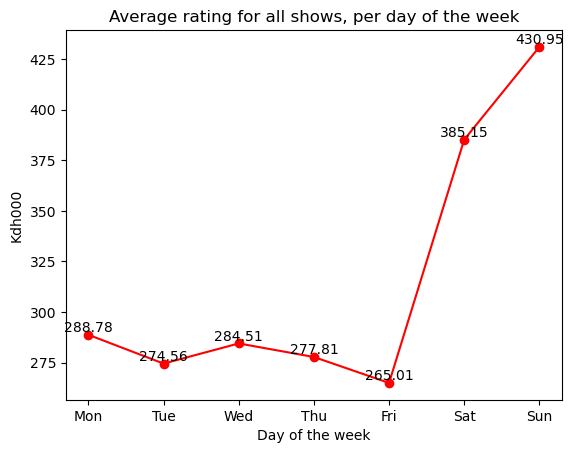

In [15]:
plt.plot(linechart_weekday, marker = 'o', color='r')
plt.title('Average rating for all shows, per day of the week') #plot title
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) #x-axis labels
plt.xlabel('Day of the week') #x-axis label
plt.ylabel('Kdh000') #y-axis label

#Add annotation to bars
for index, value in enumerate(linechart_weekday):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.savefig('visualization/Average rating for all shows, per day of the week.png') #Saving the plot as a png file.

### Repeat the above analysis, but for the target group with the highest average rating.

In [16]:
# subset the data to only include the target group with the highest average rating
df_totaal_subset = df_totaal[df_totaal['Target Group'] == 'tot6plus']

linechart_target_group = df_totaal_subset.groupby(df_totaal_subset['date_time'].dt.weekday)["Kdh000"].mean()

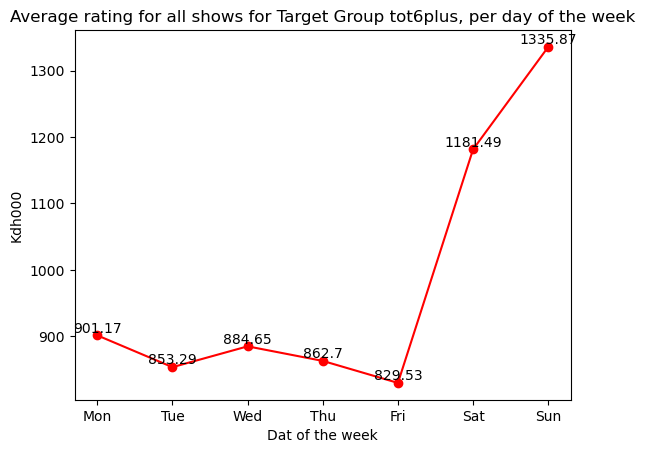

In [17]:
plt.plot(linechart_target_group, marker = 'o', color='r')
plt.title('Average rating for all shows for Target Group tot6plus, per day of the week') #plot title
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) #x-axis labels
plt.xlabel('Dat of the week') #X-axis label
plt.ylabel('Kdh000') #Y-axis label

#Add annotations to bars
for index, value in enumerate(linechart_target_group):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.savefig('visualization/Average rating for all shows for Target Group tot6plus, per day of the week.png') #Saving the plot as a png file.